In [15]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import chi2
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error # 导入回归评估指标

df = pd.read_csv(r"C:\Users\白猪白猪\Documents\Documents\CMSE802\Class_Material\Homework\Project\Data\reduced_vif_data.csv")
X = df.iloc[:, :-3]
y = df.iloc[:, -2]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
model2 = XGBRegressor(n_estimators= 100,random_state=100,early_stopping_rounds=10)

In [3]:
from tqdm import tqdm
import logging
import datetime
import itertools

logger = logging.getLogger('XGBoost_gridsearch')
logger.setLevel(logging.INFO)

handler = logging.FileHandler('C:\Users\白猪白猪\Documents\Documents\CMSE802\Class_Material\Homework\Project\XGBoost_gridsearch.log')
handler.setLevel(logging.INFO)

logger.addHandler(handler)

model2 = XGBRegressor(n_estimators= 100,random_state=100,early_stopping_rounds=10)

In [ ]:
## Search for optimal parameters-n_estimators & learning_rate & max_depth & min_child_weight

#param_grid = {
#    'n_estimators': range(10, 310, 10),
#    'learning_rate': [0.1],
#    'max_depth': range(1, 21, 2),
#    'min_child_weight': range(1, 12, 2),
#}


param_grid = {
    'n_estimators': range(70, 91, 1),
    'learning_rate': [0.1],
    'max_depth': range(1, 6, 1),
    'min_child_weight': range(1, 6, 1),
}

num_combinations = len(list(itertools.product(*param_grid.values())))

cv = 10

total_fits = num_combinations * cv

logger.info("\nParameter grid: %s", param_grid)
logger.info("CV: %d", cv)
logger.info("Total number of fits: %d", total_fits)

class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

with TqdmUpTo(unit='B', unit_scale=True, miniters=1, desc='GridSearchCV') as t:
     
    start_time = datetime.datetime.now()
    logger.info("Start time: %s", start_time)
    
    grid_search = GridSearchCV(model2, param_grid=param_grid, cv=cv, n_jobs=1, verbose=2)
    grid_search.fit(X_train, Y_train.values.ravel(),eval_set=[(X_test, Y_test)],verbose=False)
    
    
    end_time = datetime.datetime.now()
    logger.info("End time: %s", end_time)

    
    total_time = end_time - start_time
    logger.info("Total run time: %s", total_time)


logger.info("Best parameters: %s", grid_search.best_params_)
logger.info("Best score: %f", grid_search.best_score_)

In [6]:
## Search for optimal parameters-n_estimators & learning_rate & max_depth & min_child_weight-1

#param_grid = {
#    'n_estimators': [89],
#    'learning_rate': [0.1],
#    'max_depth': [3],
#    'min_child_weight': [4],
#    'gamma': np.arange(0.00, 1.10, 0.20),
#    'subsample': np.arange(0.50, 1.00, 0.10)
#}

param_grid = {
    'n_estimators': [89],
    'learning_rate': [0.1],
    'max_depth': [3],
    'min_child_weight': [4],
    'gamma': np.arange(0.0, 0.21, 0.01),
    'subsample': np.arange(0.70, 0.91, 0.01)
}


num_combinations = len(list(itertools.product(*param_grid.values())))


cv = 10


total_fits = num_combinations * cv


logger.info("\nParameter grid: %s", param_grid)
logger.info("CV: %d", cv)
logger.info("Total number of fits: %d", total_fits)

class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

with TqdmUpTo(unit='B', unit_scale=True, miniters=1, desc='GridSearchCV') as t:
     
    start_time = datetime.datetime.now()
    logger.info("Start time: %s", start_time)
    
    grid_search = GridSearchCV(model2, param_grid=param_grid, cv=cv, n_jobs=1, verbose=2)
    grid_search.fit(X_train, Y_train.values.ravel(),eval_set=[(X_test, Y_test)],verbose=False)
    
    
    end_time = datetime.datetime.now()
    logger.info("End time: %s", end_time)

    
    total_time = end_time - start_time
    logger.info("Total run time: %s", total_time)


logger.info("Best parameters: %s", grid_search.best_params_)
logger.info("Best score: %f", grid_search.best_score_)


GridSearchCV: 0.00B [00:00, ?B/s]

Fitting 10 folds for each of 462 candidates, totalling 4620 fits
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_

[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END

[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=

[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.0, learning_rate=

[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s


[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV]

[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.01, learni

[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_

[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s


[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.02, learni

[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.02, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.02, learni

[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s


[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s


[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.03, learni

[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.03, learni

[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s


[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, mi

[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.04, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.04, learni

[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s


[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s


[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.05, learni

[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.05, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.05, learni

[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s


[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s


[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.06, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.06, learni

[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[C

[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s


[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.07, learni

[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.07, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.07, learni

[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s


[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END

[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.08, learni

[CV] END gamma=0.08, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time= 

[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s


[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.09, learni

[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.09, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.09, learni

[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END

[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END g

[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=

[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child

[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s


[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.11, learni

[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.11, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.11, learni

[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s


[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s


[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.12, learni

[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.12, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.12, learni

[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s


[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, mi

[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.13, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.13, learni

[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s


[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s


[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.14, learni

[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.14, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.14, learni

[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s


[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.81; total time=   0.0s


[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.15, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8700000000000001; total time=   0.0s
[CV] END gamma=0.15, learni

[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.71; total time=   0.0s
[C

[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.78; total time=   0.0s


[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8400000000000001; total time=   0.0s
[CV] END gamma=0.16, learni

[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.16, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9000000000000001; total time=   0.0s
[CV] END gamma=0.16, learni

[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.74; total time=   0.0s


[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8; total time=   0.0s
[CV] END

[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8600000000000001; total time=   0.0s
[CV] END gamma=0.17, learni

[CV] END gamma=0.17, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.7; total time= 

[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.77; total time=   0.0s


[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8300000000000001; total time=   0.0s
[CV] END gamma=0.18, learni

[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.18, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8900000000000001; total time=   0.0s
[CV] END gamma=0.18, learni

[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.72; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.73; total time=   0.0s


[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.79; total time=   0.0s


[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8500000000000001; total time=   0.0s
[CV] END gamma=0.19, learni

[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.19, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.9100000000000001; total time=   0.0s
[CV] END gamma=0.19, learni

[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.75; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.76; total time=   0.0s
[CV] END

[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8200000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=

[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, subsample=0.8800000000000001; total time=   0.0s
[CV] END gamma=0.2, learning_rate=

In [8]:
# 搜索最佳参数-gamma

#param_grid = {
#    'n_estimators': range(10, 1510, 10),
#    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#    'max_depth': range(1,52,2),
#    'min_child_weight': range(1,6,2),
#    'gamma': [i/10.0 for i in range(0,5)],
#    'subsample': [i/10.0 for i in range(6,10)],
#    'colsample_bytree': [i/10.0 for i in range(6,10)]
#}


param_grid = {
    'n_estimators': [89],
    'learning_rate': [0.1],
    'max_depth': [3],
    'min_child_weight': [4],
    'gamma': [0.00],
    'subsample': [0.78],
    'colsample_bytree': np.arange(0.50,1.01,0.01),
    'reg_alpha':np.arange(0.00,0.55,0.05)
}

# 计算参数网格中的组合数量
num_combinations = len(list(itertools.product(*param_grid.values())))

# 设置 K 折的数量
cv = 10

# 计算总的拟合次数
total_fits = num_combinations * cv

# 将超参数范围信息、K 折的数量和拟合数量记录到日志
logger.info("\nParameter grid: %s", param_grid)
logger.info("CV: %d", cv)
logger.info("Total number of fits: %d", total_fits)

class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

with TqdmUpTo(unit='B', unit_scale=True, miniters=1, desc='GridSearchCV') as t:
     # 记录开始时间和日期
    start_time = datetime.datetime.now()
    logger.info("Start time: %s", start_time)
    
    grid_search = GridSearchCV(model2, param_grid=param_grid, cv=cv, n_jobs=1, verbose=2)
    grid_search.fit(X_train, Y_train.values.ravel(),eval_set=[(X_test, Y_test)],verbose=False)
    
    # 记录结束时间和日期
    end_time = datetime.datetime.now()
    logger.info("End time: %s", end_time)

    # 计算并记录运行总时长
    total_time = end_time - start_time
    logger.info("Total run time: %s", total_time)

# 将最佳参数和得分记录到日志
logger.info("Best parameters: %s", grid_search.best_params_)
logger.info("Best score: %f\n", grid_search.best_score_)


GridSearchCV: 0.00B [00:00, ?B/s]

Fitting 10 folds for each of 561 candidates, totalling 5610 fits
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subs

[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5

[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5, 

[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2,

[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.51, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.52, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89

[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_byt

[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89

[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.53, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree

[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.54, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytr

[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89

[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.55, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.56, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89

[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimat

[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5700000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estim

[CV] END colsample_bytree=0.5800000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5800000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5800000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5800000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5800000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.580000000000

[CV] END colsample_bytree=0.5800000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5800000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5800000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5800000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5800000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5800000000000001, gamma=0.0,

[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth

[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.5900000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6000000000000001, gamma=0.0,

[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estim

[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.610000000000

[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6100000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6200000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6300000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.630000000000

[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6400000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estim

[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6500000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.650000000000

[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estim

[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6600000000000001, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.6700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6700000000000002, gamma=0.0,

[CV] END colsample_bytree=0.6700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.670000000000

[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estima

[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estima

[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.690000000000

[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.6900000000000002, gamma=0.0, learning_rate=0

[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate

[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7000000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0

[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7100000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estima

[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.720000000000

[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7200000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7300000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7400000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.740000000000

[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimato

[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7500000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weigh

[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7600000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.760000000000

[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7700000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.7800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.780000000000

[CV] END colsample_bytree=0.7800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7800000000000002, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.780000000000

[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estim

[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.7900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimat

[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.800000000000

[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.1, max_depth=3,

[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0

[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8100000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3,

[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8200000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimat

[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.830000000000

[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8300000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8400000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimato

[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8500000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.850000000000

[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimato

[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8600000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weigh

[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8700000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.870000000000

[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8800000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.8900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.890000000000

[CV] END colsample_bytree=0.8900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8900000000000003, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.890000000000

[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estim

[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimat

[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.910000000000

[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9100000000000004, gamma=0.0, learning_rate=0.1, max_depth=3,

[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0

[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9200000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.1s
[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3,

[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9300000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.05, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimat

[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.940000000000

[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9400000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.5, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.4, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9500000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimato

[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.30000000000000004, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9600000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.960000000000

[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.2, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimato

[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9700000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.1, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weigh

[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9800000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.980000000000

[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator

[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.25, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.45, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.9900000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_esti

[CV] END colsample_bytree=1.0000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=1.0000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=1.0000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=1.0000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=1.0000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.15000000000000002, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=1.000000000000

[CV] END colsample_bytree=1.0000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=1.0000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=1.0000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=1.0000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=1.0000000000000004, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.35000000000000003, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=1.000000000000

In [9]:
# 搜索最佳参数-降低rate

param_grid = {
    'n_estimators': [89],
    'learning_rate': np.arange(0.01,0.21,0.01),
    'max_depth': [3],
    'min_child_weight': [4],
    'gamma': [0.00],
    'subsample': [0.78],
    'colsample_bytree': [0.8000000000000003],
    'reg_alpha':[0.0]
}

# 计算参数网格中的组合数量
num_combinations = len(list(itertools.product(*param_grid.values())))

# 设置 K 折的数量
cv = 10

# 计算总的拟合次数
total_fits = num_combinations * cv

# 将超参数范围信息、K 折的数量和拟合数量记录到日志
logger.info("\nParameter grid: %s", param_grid)
logger.info("CV: %d", cv)
logger.info("Total number of fits: %d", total_fits)

class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

with TqdmUpTo(unit='B', unit_scale=True, miniters=1, desc='GridSearchCV') as t:
     # 记录开始时间和日期
    start_time = datetime.datetime.now()
    logger.info("Start time: %s", start_time)
    
    grid_search = GridSearchCV(model2, param_grid=param_grid, cv=cv, n_jobs=1, verbose=2)
    grid_search.fit(X_train, Y_train.values.ravel(),eval_set=[(X_test, Y_test)],verbose=False)
    
    # 记录结束时间和日期
    end_time = datetime.datetime.now()
    logger.info("End time: %s", end_time)

    # 计算并记录运行总时长
    total_time = end_time - start_time
    logger.info("Total run time: %s", total_time)

# 将最佳参数和得分记录到日志
logger.info("Best parameters: %s", grid_search.best_params_)
logger.info("Best score: %f", grid_search.best_score_)


GridSearchCV: 0.00B [00:00, ?B/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=

[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.060000000000000005, max_depth=3, min_child

[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.09, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.09999999999999999, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.09999999999999999, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.09999999999999999, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.09999999999999999, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0

[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.14, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.14, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.14, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.14, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.14, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.14, max_depth=3, min_child_weight=4, n_est

[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.18000000000000002, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.18000000000000002, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.19, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.19, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.19, max_depth=3, min_child_weight=4, n_estimators=89, reg_alpha=0.0, subsample=0.78; total time=   0.0s
[CV] END colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.19, max_dept

In [56]:
best_params = {
    'n_estimators': 89,
    'learning_rate': 0.15,
    'max_depth': 3,
    'min_child_weight': 4,
    'gamma': 0.0,
    'subsample': 0.78,
    'colsample_bytree': 0.8000000000000003,
    'reg_alpha':0.0, 
    'random_state':100
}

model3 = XGBRegressor(**best_params)
model3.fit(X_train,Y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.8000000000000003, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0.0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=89, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=100, reg_alpha=0.0, reg_lambda=1, ...)

In [57]:

y_pred = model3.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean square error of the prediction set: {mse}")

rmse = np.sqrt(mse)
print(f"Root-mean-square error of the prediction set: {rmse}")

mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean absolute error of the prediction set: {mae}")

r2 = r2_score(Y_test, y_pred)
print(f"R² score of the prediction set: {r2}")

y_train_pred = model3.predict(X_train)

mse_train = mean_squared_error(Y_train, y_train_pred)
print(f"Mean square error of the training set: {mse_train}")

rmse_train = np.sqrt(mse_train)
print(f"Root mean square error of the training set: {rmse_train}")

mae_train = mean_absolute_error(Y_train, y_train_pred)
print(f"Mean absolute error of the training set: {mae_train}")


r2_train = r2_score(Y_train, y_train_pred)
print(f"R² score of the training set: {r2_train}")

预测集的均方误差: 0.0008378027884418237
预测集的均方根误差: 0.028944823171714554
预测集的平均绝对误差: 0.012404799156833533
预测集的R²分数: 0.4875072980352977
训练集的均方误差: 0.00028090391671973315
训练集的均方根误差: 0.01676018844523334
训练集的平均绝对误差: 0.00711191037208449
训练集的R²分数: 0.6223879903544405


特征排名：
1. 特征 4 (0.552437)
2. 特征 1 (0.158741)
3. 特征 2 (0.114646)
4. 特征 0 (0.100501)
5. 特征 3 (0.073676)


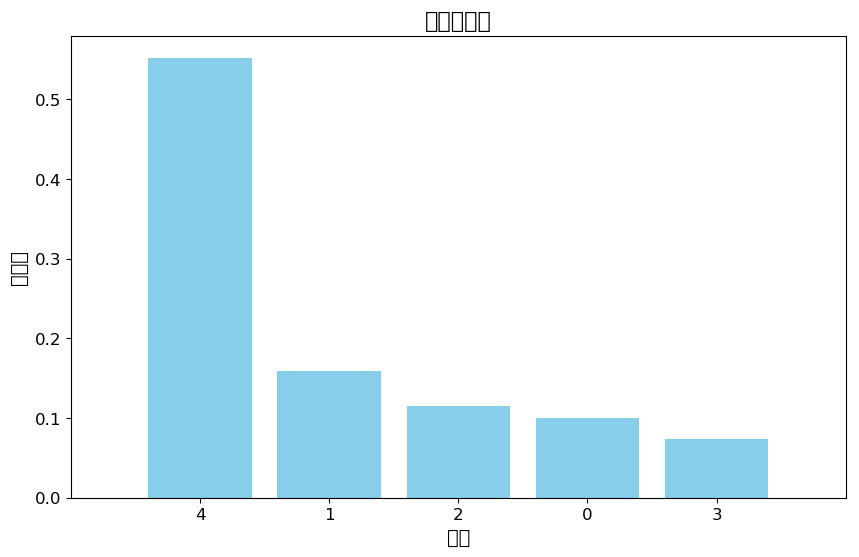

In [58]:
importances = model3.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature Ranking：")
for f in range(X_train.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize=(10, 6))
plt.title("Feature importance", fontsize=16)
plt.bar(range(X_train.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X_train.shape[1]), indices, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance', fontsize=14)
plt.xlabel('Feature', fontsize=14)
plt.show()

特征排名：
4       1.051 +/- 0.057
2       0.134 +/- 0.022
0       0.035 +/- 0.007
3       0.029 +/- 0.007
1       0.018 +/- 0.004


Text(0.5,0,'特征')

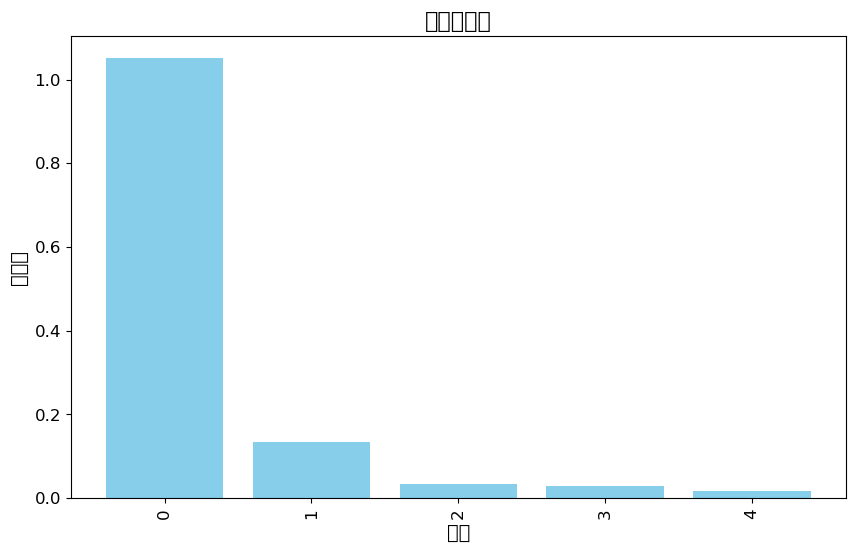

In [60]:
from sklearn.inspection import permutation_importance

importances = permutation_importance(model3, X_train, Y_train,scoring='explained_variance', n_repeats=20, random_state=100, n_jobs=1)


indices = np.argsort(importances.importances_mean)[::-1]

print("Feature Ranking:")
for i in indices:
    if importances.importances_mean[i] - 2 * importances.importances_std[i] > 0:
        print(f"{i:<8}"
              f"{importances.importances_mean[i]:.3f}"
              f" +/- {importances.importances_std[i]:.3f}")

plt.figure(figsize=(10, 6))
plt.title("Feature importancE", fontsize=16)
plt.bar(range(X_train.shape[1]), importances.importances_mean[indices], color="skyblue", align="center")
plt.xticks(range(X_train.shape[1]), range(X_train.shape[1]), fontsize=12, rotation='vertical')
plt.yticks(fontsize=12)
plt.ylabel('Importance', fontsize=14)
plt.xlabel('Feature', fontsize=14)